# K Nearest Neighbors - Case Study 

Welcome to the KNN Case Study using Regression

<h3>Import Libraries </h3>
Import pandas,seaborn, and the usual libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data
Credit Score Dataset

<h3>Get the Data</h3>


In [44]:
df = pd.read_csv('Credit-Score-Dataset.csv').dropna()

In [45]:
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [46]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [48]:
df.keys()

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [49]:
df.shape

(164, 8)

In [50]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [51]:
# view summary statistics in numerical variables

round(df.describe(),2)

,Age,Income,Number of Children
count,164.00,164.00,164.00
mean,37.98,83765.24,0.65
std,8.48,32457.31,0.88
min,25.00,25000.00,0.00
25%,30.75,57500.00,0.00
50%,37.00,83750.00,0.00
75%,45.00,105000.00,1.00
max,53.00,162500.00,3.00


In [52]:
# Checking dublicate values
df.duplicated().sum()

62

In [53]:
print(df.drop_duplicates())

     Age  Gender  Income            Education Marital Status  \
0     25  Female   50000    Bachelor's Degree         Single   
1     30    Male  100000      Master's Degree        Married   
2     35  Female   75000            Doctorate        Married   
3     40    Male  125000  High School Diploma         Single   
4     45  Female  100000    Bachelor's Degree        Married   
..   ...     ...     ...                  ...            ...   
130   31    Male   95000            Doctorate         Single   
131   26  Female   55000    Bachelor's Degree        Married   
132   32    Male   85000      Master's Degree         Single   
133   29  Female   68000            Doctorate        Married   
134   34    Male  105000    Bachelor's Degree        Married   

     Number of Children Home Ownership Credit Score  
0                     0         Rented         High  
1                     2          Owned         High  
2                     1          Owned         High  
3              

# EDA-Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an important step in data analysis that involves understanding and visualizing the structure and characteristics of a dataset. It provides various libraries and tools that can be used for EDA. Here's an example of EDA code in Python using popular libraries like Pandas, Matplotlib, and Seaborn.

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


In [55]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])
df["Education"]=le.fit_transform(df["Education"])
df["Home Ownership"]=le.fit_transform(df["Home Ownership"])
df["Marital Status"]=le.fit_transform(df["Marital Status"])
df["Credit Score"]=le.fit_transform(df["Credit Score"])

In [58]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,1,1,0,1,1
1,30,1,100000,4,0,2,0,1
2,35,0,75000,2,0,1,0,1
3,40,1,125000,3,1,0,0,1
4,45,0,100000,1,0,3,0,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 164 non-null    int64
 1   Gender              164 non-null    int32
 2   Income              164 non-null    int64
 3   Education           164 non-null    int32
 4   Marital Status      164 non-null    int32
 5   Number of Children  164 non-null    int64
 6   Home Ownership      164 non-null    int32
 7   Credit Score        164 non-null    int32
dtypes: int32(5), int64(3)
memory usage: 7.2 KB


In [60]:
# Removing outliers
def remove_outliers(df, threshold=3):
    # Calculate z-scores
    z_scores = (df - np.mean(df)) / np.std(df)

    # Identify outliers
    outliers = np.abs(z_scores) > threshold

    # Remove outliers from data
    cleaned_data = df[~outliers]

    return cleaned_data


cleaned_data = remove_outliers(df)
print(cleaned_data)

     Age  Gender  Income  Education  Marital Status  Number of Children  \
0     25       0   50000          1               1                   0   
1     30       1  100000          4               0                   2   
2     35       0   75000          2               0                   1   
3     40       1  125000          3               1                   0   
4     45       0  100000          1               0                   3   
..   ...     ...     ...        ...             ...                 ...   
159   29       0   27500          3               1                   0   
160   34       1   47500          0               1                   0   
161   39       0   62500          1               0                   2   
162   44       1   87500          4               1                   0   
163   49       0   77500          2               0                   1   

     Home Ownership  Credit Score  
0                 1             1  
1                 0        

C:\Users\Dell\AppData\Local\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


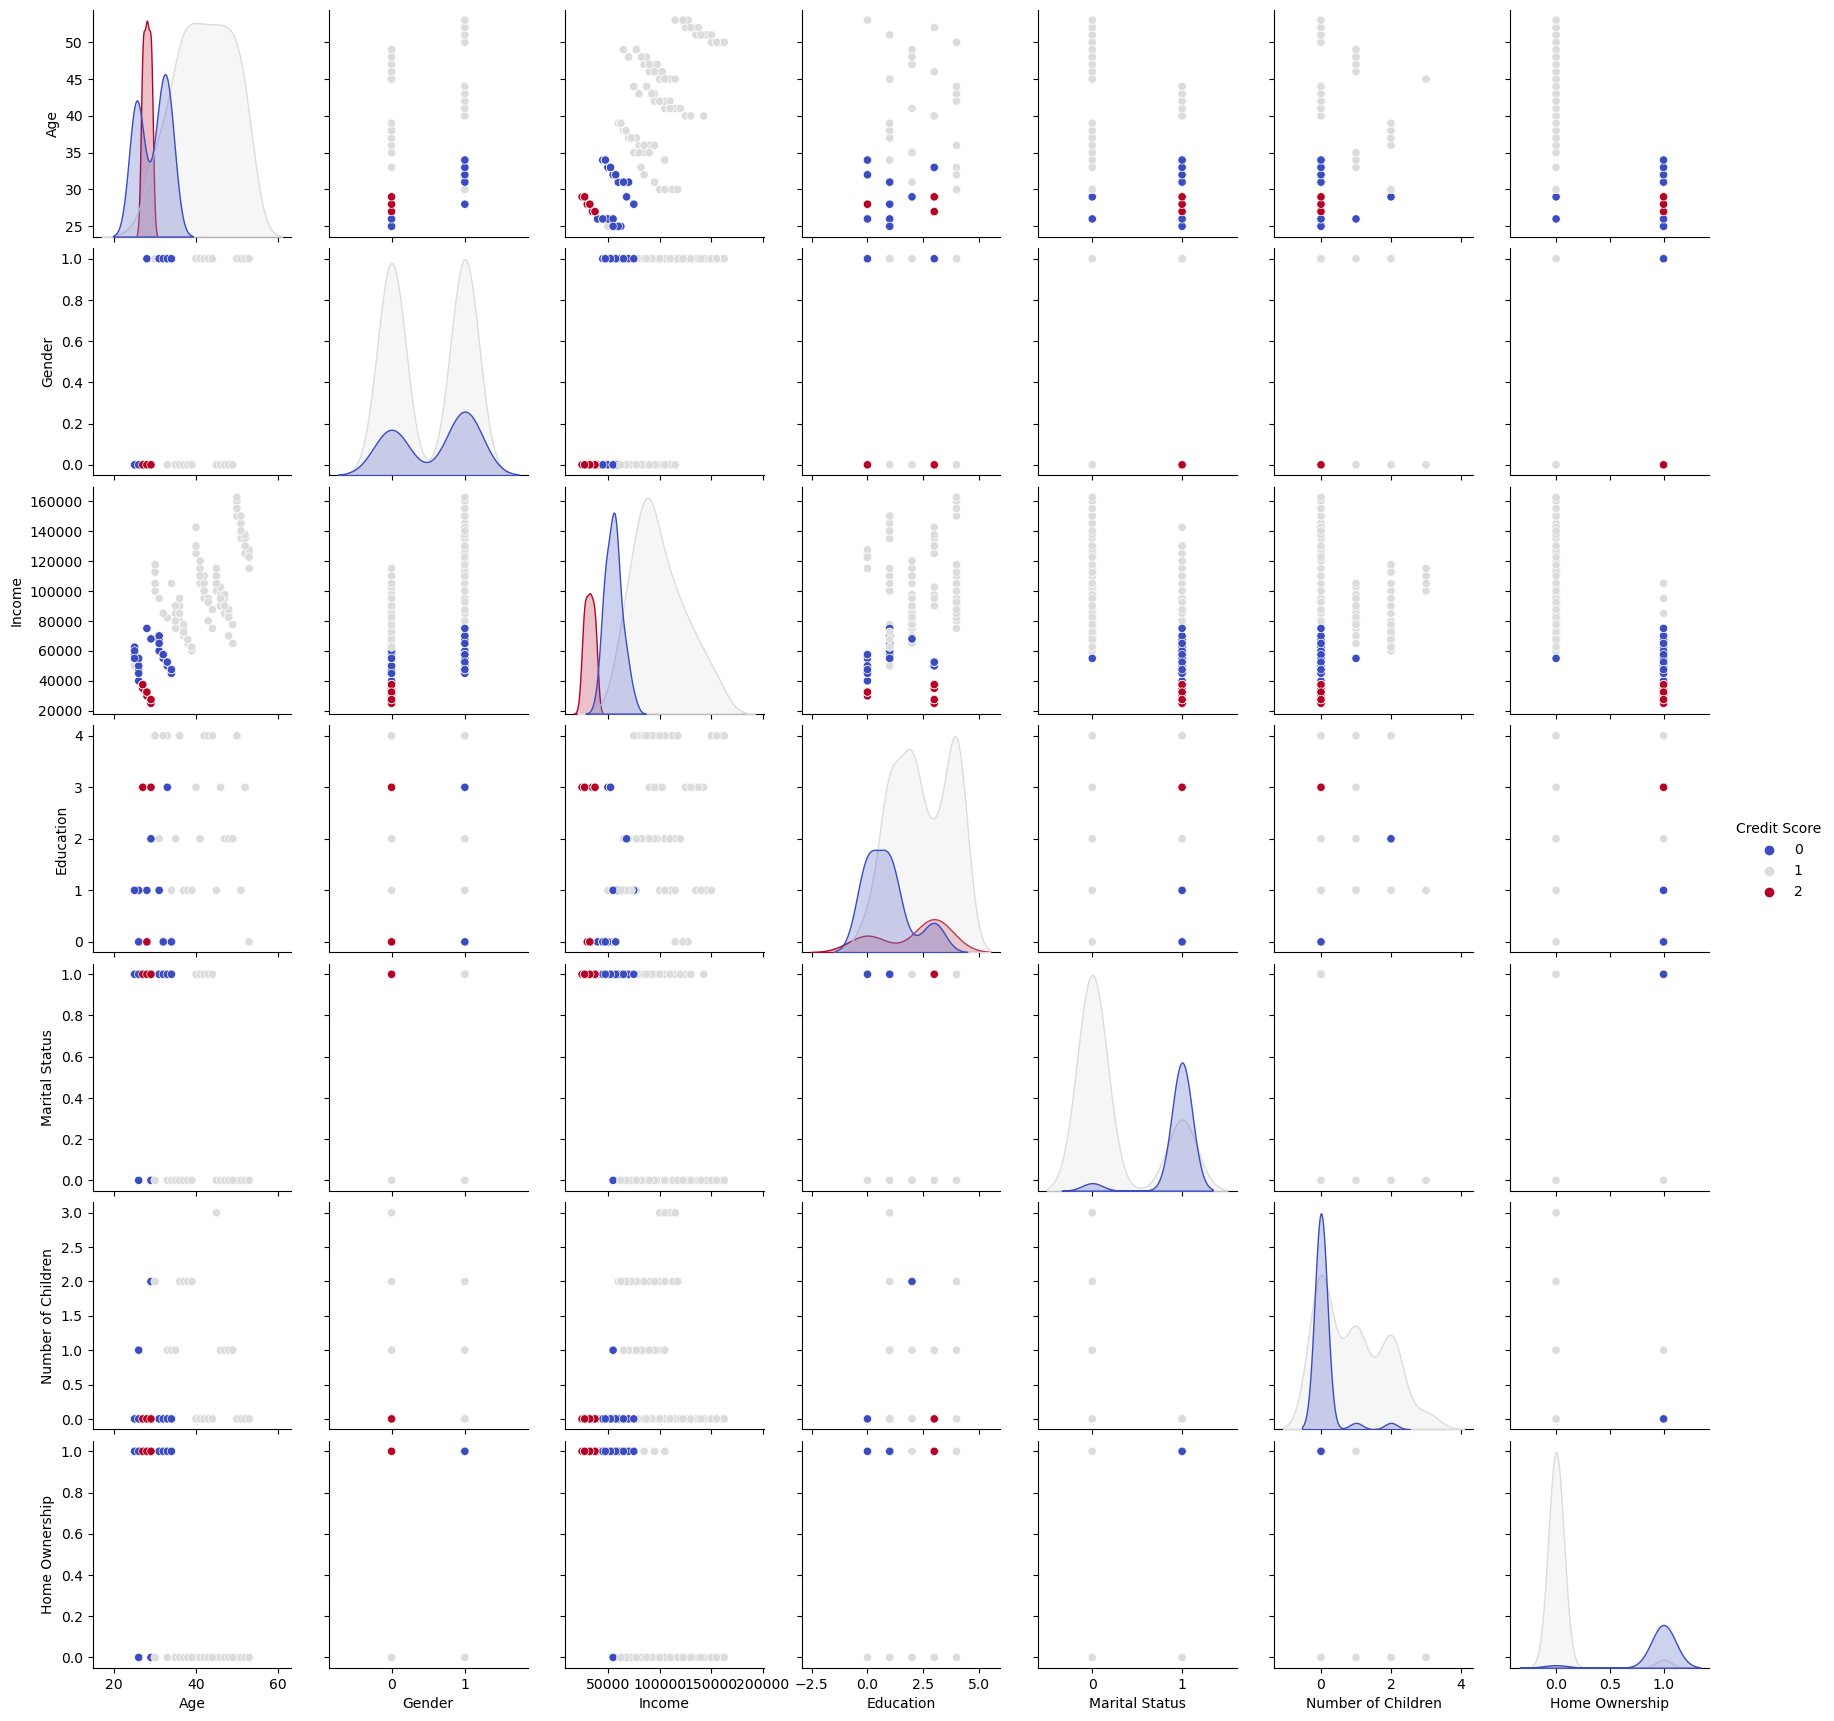

In [61]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='Credit Score',palette='coolwarm')

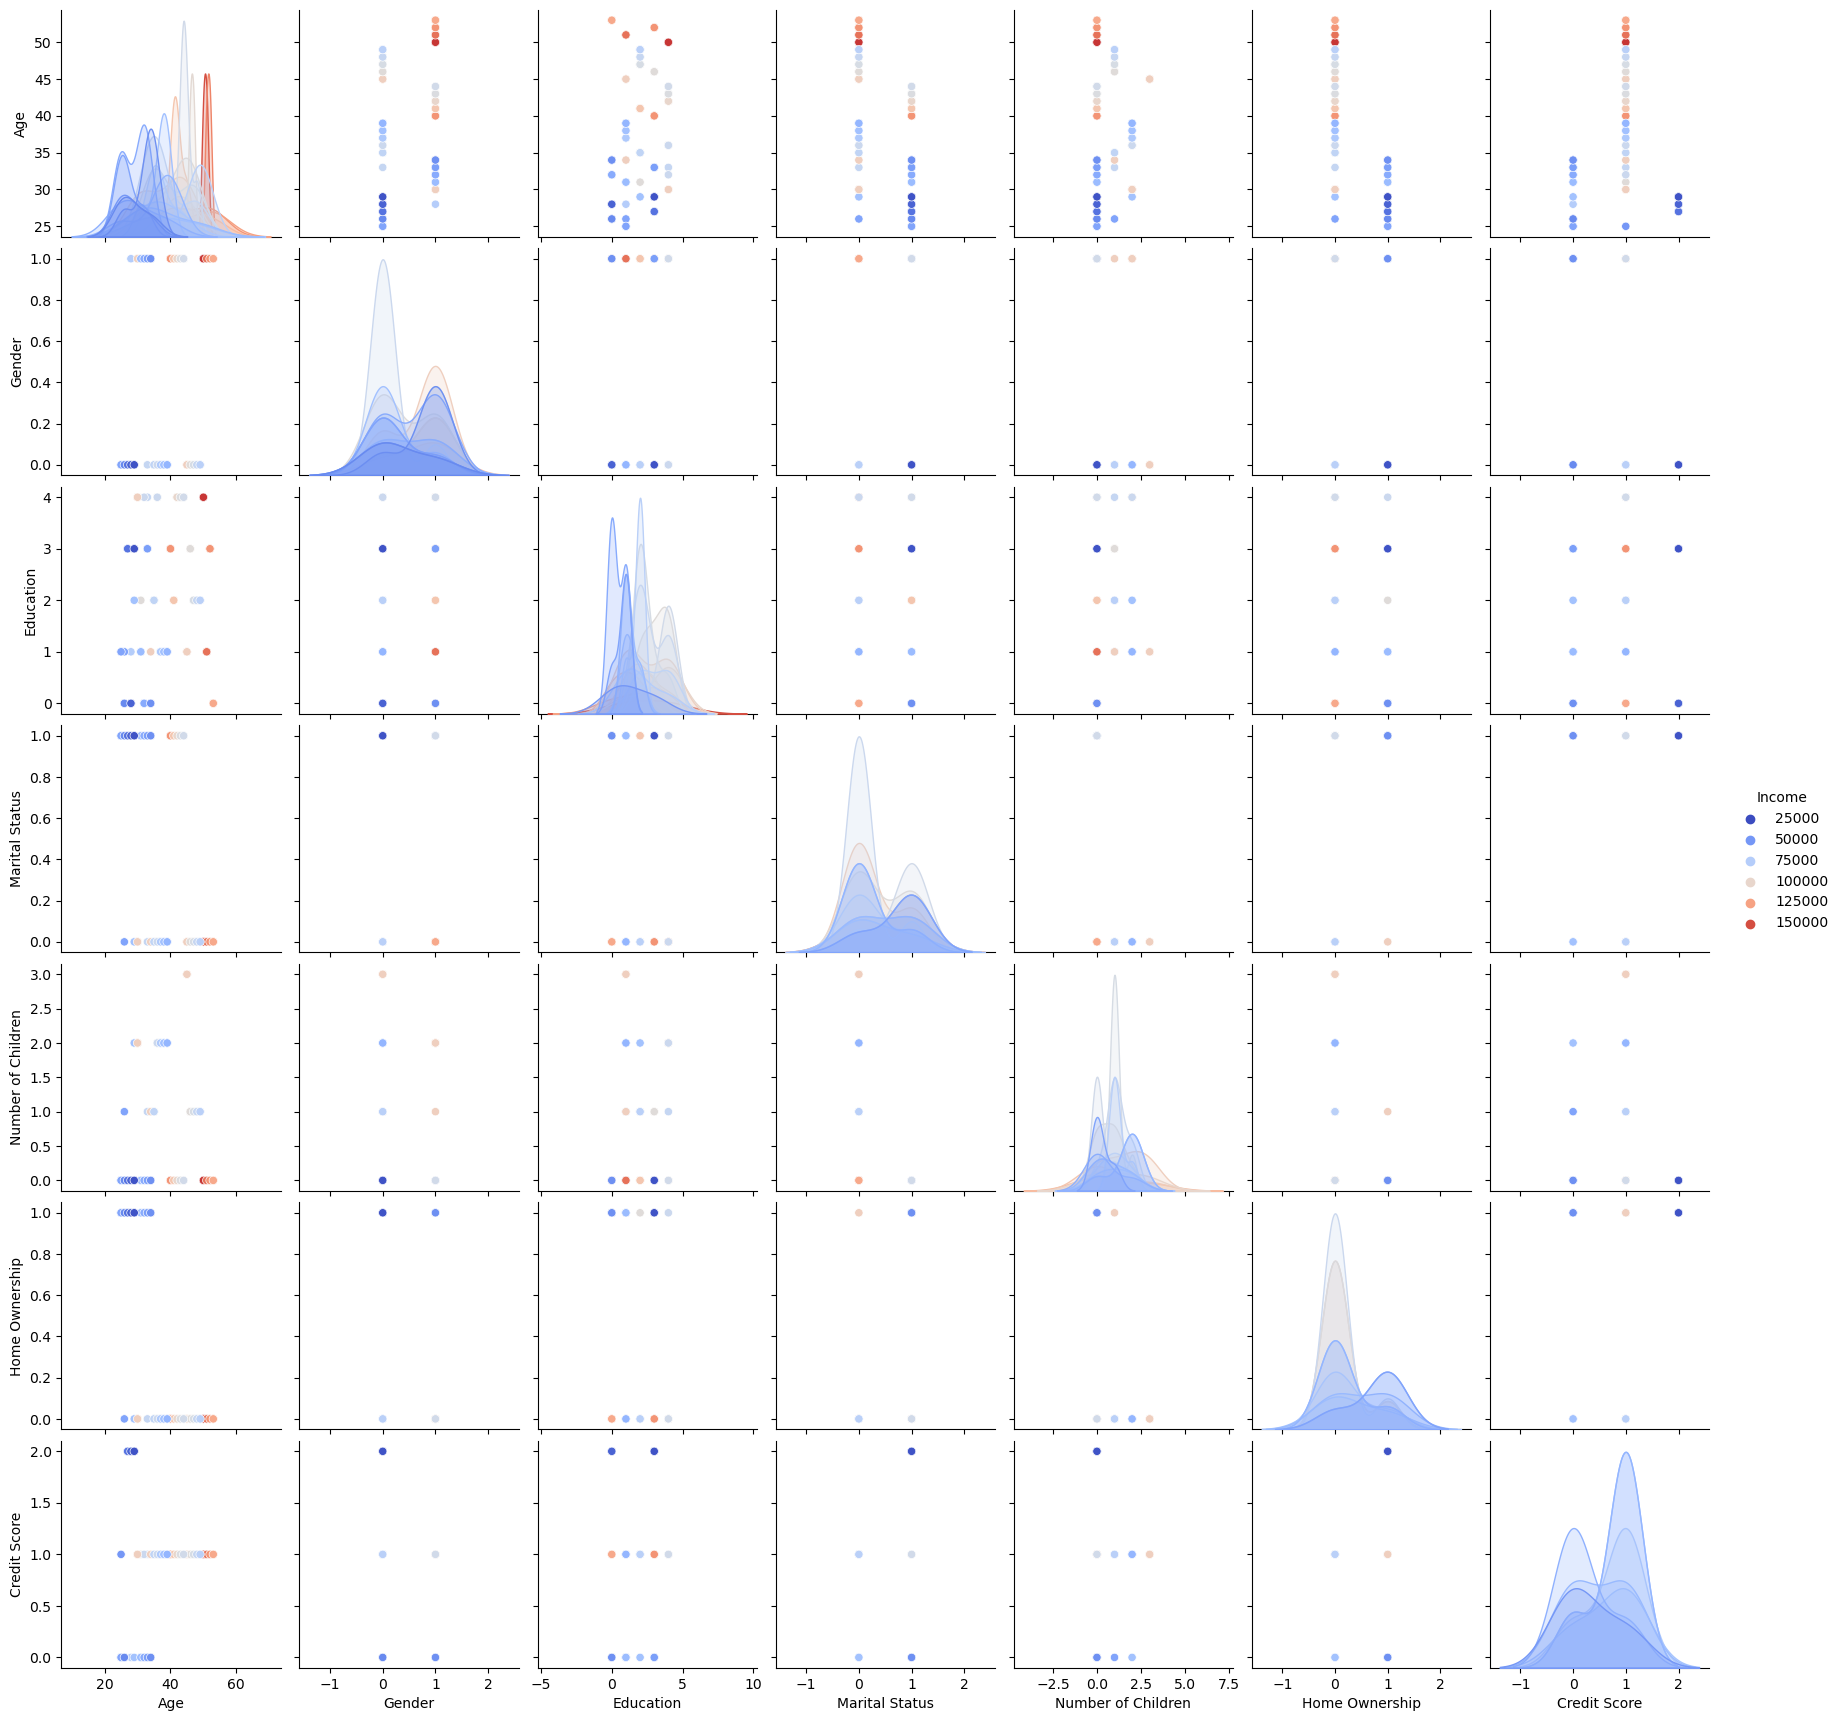

In [62]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='Income',palette='coolwarm')

<Axes: >

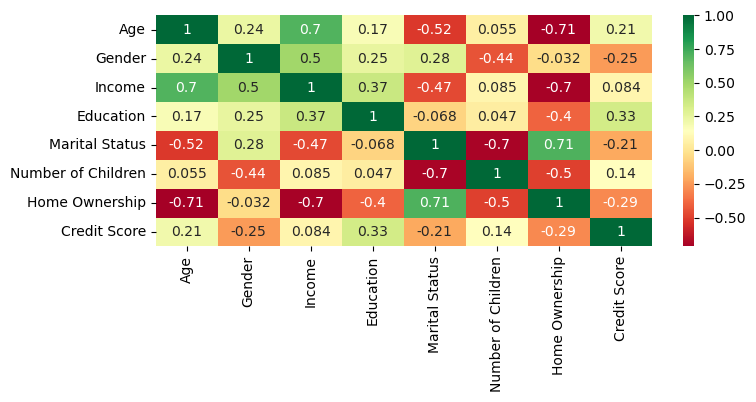

In [63]:
plt.figure(figsize=(8,3))  

sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  

<h3>Standardize the Variables</h3>
Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
scaler.fit(df.drop('Credit Score',axis=1))

StandardScaler()

In [69]:
scaled_features = scaler.transform(df.drop('Credit Score',axis=1))

In [70]:
scaled_features

array([[-1.53531997, -0.95235327, -1.04348337, ...,  1.06295349,
        -0.74086152,  1.44718334],
       [-0.94370231,  1.05003052,  0.50172   , ..., -0.94077493,
         1.53019061, -0.69099745],
       [-0.35208465, -0.95235327, -0.27088169, ..., -0.94077493,
         0.39466455, -0.69099745],
       ...,
       [ 0.12120947, -0.95235327, -0.65718253, ..., -0.94077493,
         1.53019061, -0.69099745],
       [ 0.71282713,  1.05003052,  0.11541915, ...,  1.06295349,
        -0.74086152, -0.69099745],
       [ 1.30444478, -0.95235327, -0.19362152, ..., -0.94077493,
         0.39466455, -0.69099745]])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Credit Score'],
                                                    test_size=0.30)

In [72]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test) # Prediction

In [73]:
print("Linear Regresson Model")
model = pd.DataFrame(X_test)
model['Credit Score'] = y_test
model['Credit Score'] = y_pred
print(model.head(10))

Linear Regresson Model
          0         1         2         3         4         5         6  \
0 -0.707055  1.050031 -0.811703 -1.486177  1.062953 -0.740862  1.447183   
1  0.712827  1.050031  0.115419  1.398238  1.062953 -0.740862 -0.690997   
2  1.777739  1.050031  1.274322 -1.486177 -0.940775 -0.740862 -0.690997   
3 -0.233761 -0.952353  0.192679  1.398238 -0.940775  1.530191 -0.690997   
4  1.541092  1.050031  1.737883 -0.765074 -0.940775 -0.740862 -0.690997   
5  1.067798 -0.952353  0.347200 -0.043970 -0.940775  0.394665 -0.690997   
6  0.712827  1.050031 -0.270882  1.398238  1.062953 -0.740862 -0.690997   
7  0.002886 -0.952353 -0.502662 -0.765074 -0.940775  1.530191 -0.690997   
8 -0.233761 -0.952353  0.038159  1.398238 -0.940775  1.530191 -0.690997   
9 -1.416996 -0.952353 -1.198004 -1.486177  1.062953 -0.740862  1.447183   

   Credit Score  
0      0.224995  
1      1.122943  
2      0.516919  
3      1.296707  
4      0.629460  
5      1.207603  
6      1.135787  
7      

In [74]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

In [75]:
mse

0.17691377491067217

In [76]:
mae

0.3288542632238549

In [77]:
df.keys()

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [78]:
X = pd.DataFrame(np.c_[df['Income']], columns = ['Income'])
Y = df['Credit Score'] 

# KNN Training and Predictions

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=1)

In [82]:
y_pred = knn.predict(X_test) 

In [83]:
y_pred

array([1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 0., 1., 1., 1., 0., 1.])

<h3>Predicted credit score depends on Income </h3>

In [85]:
print("--------KNN Regresson Model---------")
knnmodel = pd.DataFrame(X_test)
knnmodel['Credit Score'] = y_test
knnmodel['Predicted Credit Score'] = y_pred
print(knnmodel.head(10))

--------KNN Regresson Model---------
     Income  Credit Score  Predicted Credit Score
146  140000             1                     1.0
89    77500             1                     1.0
106   57500             0                     0.0
7     60000             0                     0.0
94   117500             1                     1.0
56    87500             1                     1.0
136  105000             1                     1.0
45    90000             1                     1.0
26    60000             1                     0.0
44   100000             1                     1.0


<h3>Measure Performance of the Model</h3>

In [86]:
# Get Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
# Get Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

In [87]:
mse

0.030303030303030304

In [88]:
mae

0.030303030303030304

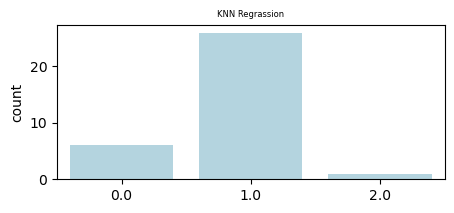

In [89]:
fig = plt.figure(figsize=(5,2))
ax = sns.countplot(x=y_pred,data=df,palette=['lightblue'])
ax.set_title('KNN Regrassion', fontsize=6)
plt.show()

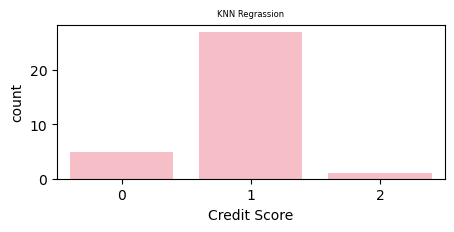

In [90]:
fig = plt.figure(figsize=(5,2))
ax = sns.countplot(x=y_test,data=df,palette=['lightpink'])
ax.set_title('KNN Regrassion', fontsize=6)
plt.show()

In [91]:
df["Credit Score"].value_counts()

1    113
0     36
2     15
Name: Credit Score, dtype: int64

# Done !!!!